## TRABALHO DE IAA002 - Linguagem de Programação Aplicada
---

### Importação das Bibliotecas

In [1]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# OPCIONAL - Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

---
### 1 Análise exploratória dos dados

#### a. Carregue a base de dados media_precos_carros_brasil.csv

In [2]:
# Função read_csv para importar os dados da pasta do computador
dados = pd.read_csv('database/precos_carros_brasil.csv')

In [3]:
# nº de linhas e colunas da tabela
linhas_inicial = dados.shape
linhas_inicial

(267542, 11)

#### b.1. Verifique se há valores faltantes nos dados. 

In [4]:

# Verificando se existem valores faltantes nos dados 
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

In [5]:
# Como em todas as colunas há o exato mesmo número de itens faltantes
# verificamos aqui se não são na verdade linhas com todos os dados faltentes
dados.isna().head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


##### b.2. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes.

In [6]:
# A melhor trarativa no caso é excluir as linhas com valores nulos
# O método dropna() remove as linhas que contêm valores nulos.
# axis=0 indica que estamos removendo as linhas com valores nulos.
dados.dropna(axis=0, inplace=True)


In [7]:
# Aqui verificamos se foram exclidos exatamente o valor acima das linhas com itens nulos.
# se o valor for igual, quer dizer só existiam linhas inteiras sem dados.

linhas_final = dados.shape
verifica_linhas = linhas_inicial[0] - linhas_final[0]
verifica_linhas


65245

In [8]:
#Verificando novamente se existem colunas com valores nulos.
dados.isna().any()

year_of_reference     False
month_of_reference    False
fipe_code             False
authentication        False
brand                 False
model                 False
fuel                  False
gear                  False
engine_size           False
year_model            False
avg_price_brl         False
dtype: bool

#### c. Verifique se há valores duplicados nos dados


In [9]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 

2

# dúvida, será que precisa remover o valor duplicado?

In [10]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)

#### d.1. Crie duas categorias, para separar colunas numéricas e categóricas

In [11]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

#### d.2. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [12]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000
mean,2021.564695,2011.271514,52756.765713
std,0.571904,6.376241,51628.912116
min,2021.000000,2000.000000,6647.000000
25%,2021.000000,2006.000000,22855.000000
50%,2022.000000,2012.000000,38027.000000
75%,2022.000000,2016.000000,64064.000000
max,2023.000000,2023.000000,979358.000000


In [13]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size
count,202295,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2,29
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual,"1,6"
freq,24260,425,1,44962,425,168684,161883,47420


#### e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)


In [14]:
# Contagem de valores por categoria de 'Modelo'
dados['model'].value_counts()

model
Palio Week. Adv/Adv TRYON 1.8 mpi Flex    425
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.     400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V      400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray     375
                                         ... 
STEPWAY Zen Flex 1.0 12V Mec.               2
Saveiro Robust 1.6 Total Flex 16V CD        2
Saveiro Robust 1.6 Total Flex 16V           2
Gol Last Edition 1.0 Flex 12V 5p            2
Polo Track 1.0 Flex 12V 5p                  2
Name: count, Length: 2112, dtype: int64

In [15]:
# Contagem de valores por categoria de 'Marca'
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

#### f.Dê um breve explicação (máximo de quatro linhas) sobre os principais resultados encontrados na Análise Exploratória dos dados
---

### 2 Visualização dos dados

#### a. Gere um gráfico da distribuição da quantidade de carros por marca


Text(0, 0.5, 'Total de carros')

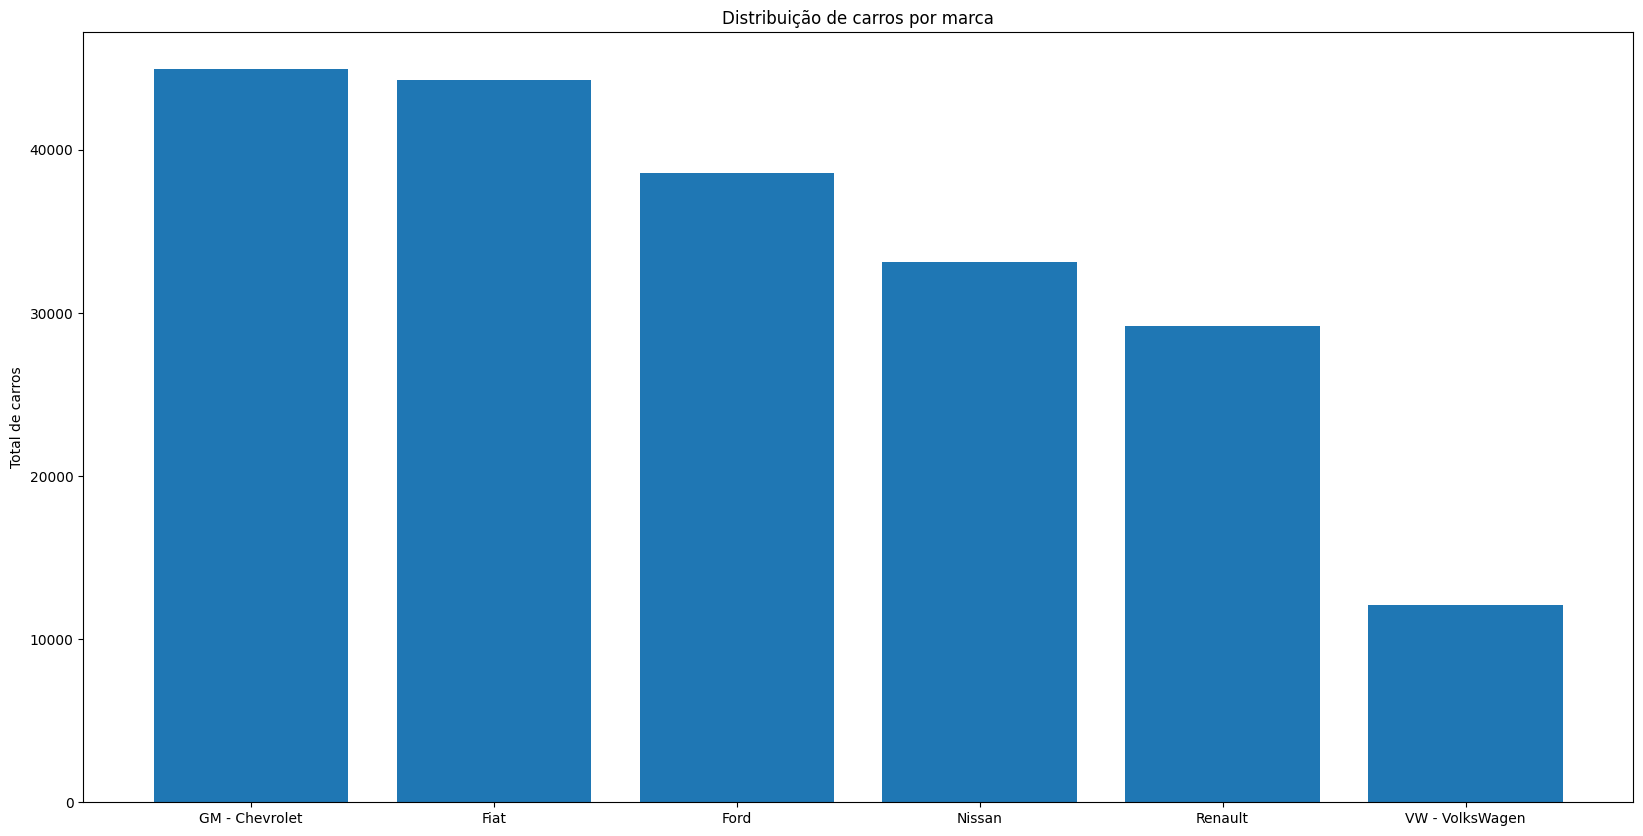

In [16]:
# Gráfico da distribuição quantidade de carros por marca.
plt.figure(figsize=(20,10))
plt.bar(dados['brand'].unique(), dados['brand'].value_counts()) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

Text(0, 0.5, 'Total de carros')

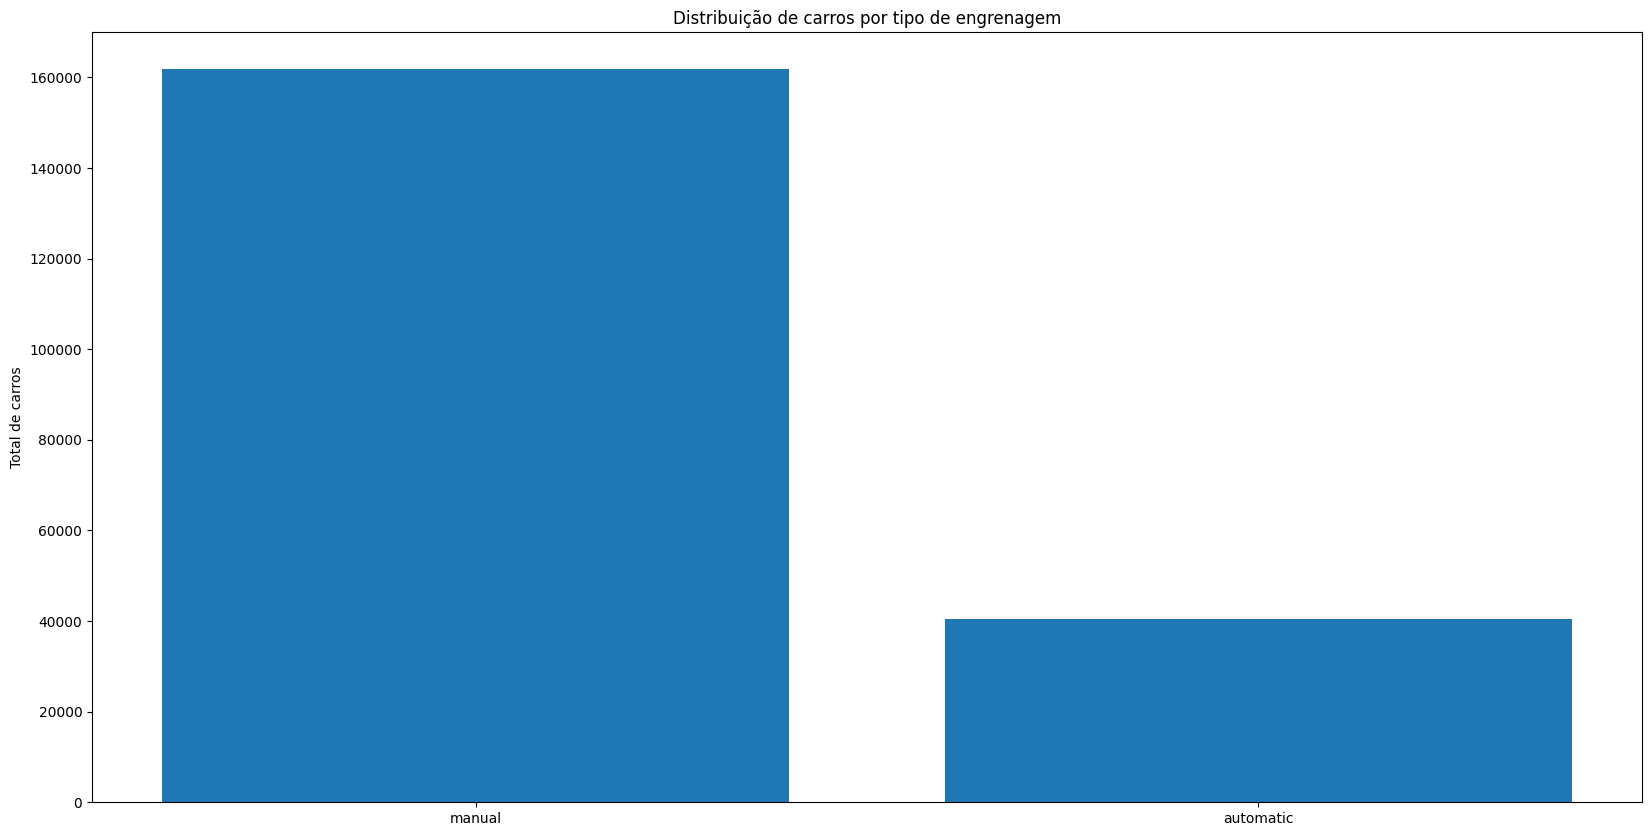

In [17]:
# Gráfico da distribuição quantidade de carros por marca.
plt.figure(figsize=(20,10))
plt.bar(dados['gear'].unique(), dados['gear'].value_counts()) # plt.bar para gráfico de barras. Variáveis nos eixos X e Y
plt.title('Distribuição de carros por tipo de engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros') # # plt.ylabel para inserir título no gráfico

#### c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [18]:
# Filtrar dados para o ano de 2022
dados_2022 = dados[dados['year_of_reference'] == 2022]

# Agrupamento por mês das médias de preço
media_vendas_mes = dados_2022.groupby('month_of_reference')['avg_price_brl'].mean().round(0)
media_vendas_mes.head()


month_of_reference
April       57150.0
August      57924.0
December    57997.0
February    55825.0
January     54840.0
Name: avg_price_brl, dtype: float64

In [19]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_vendas_mes = media_vendas_mes.reset_index(name='Preco Medio')
media_vendas_mes.head()

,month_of_reference,Preco Medio
0,April,57150.0
1,August,57924.0
2,December,57997.0
3,February,55825.0
4,January,54840.0


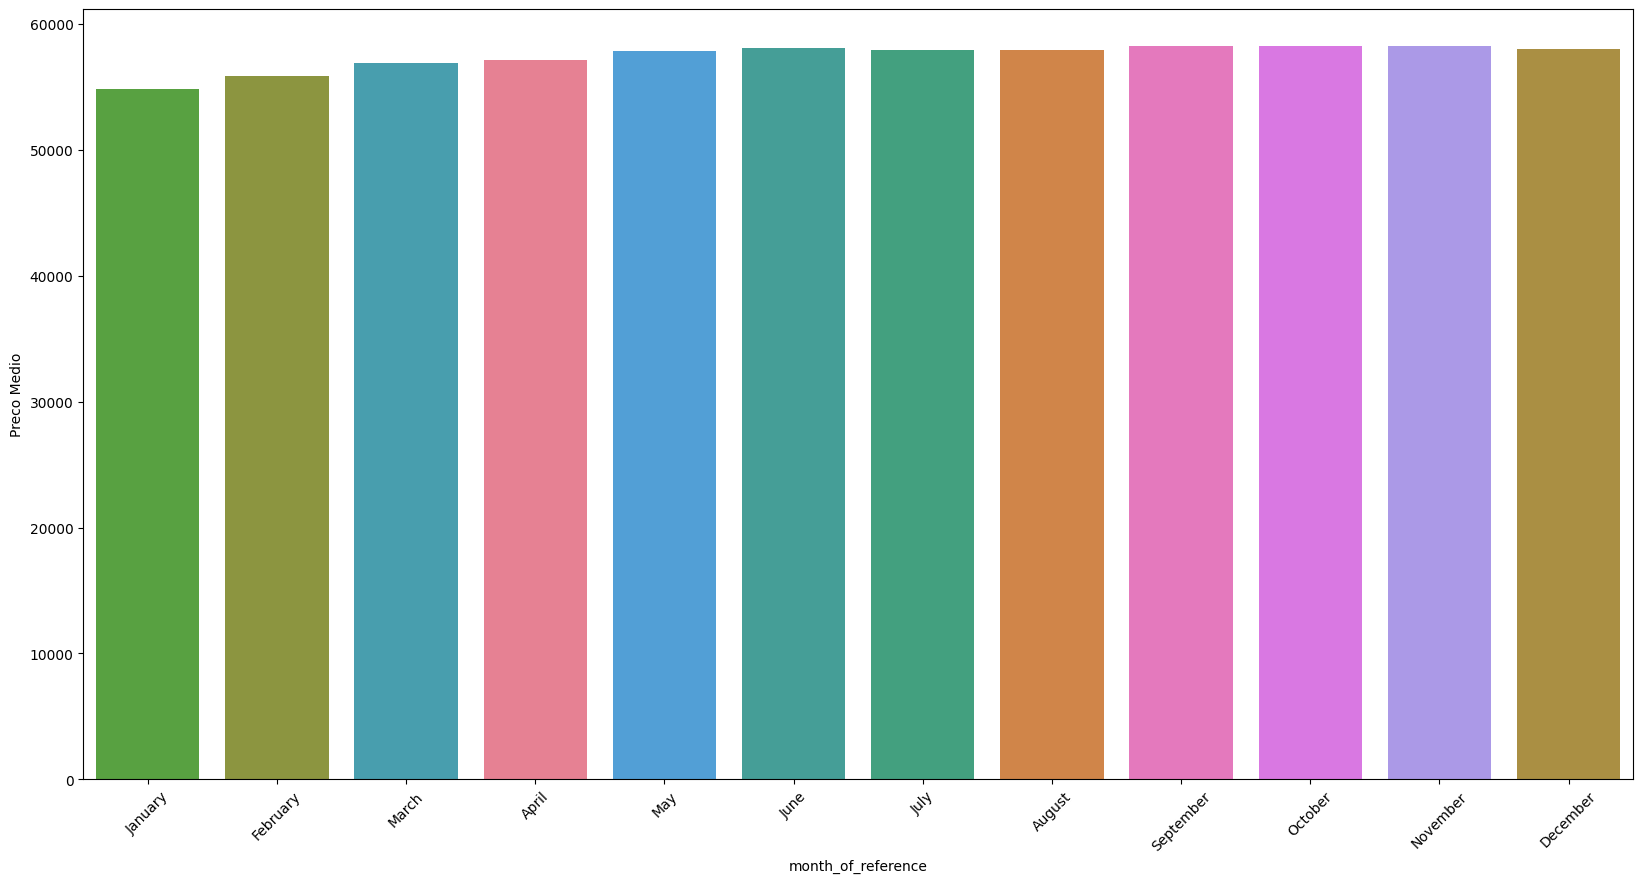

In [20]:
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='month_of_reference', y='Preco Medio', hue='month_of_reference' , data = media_vendas_mes, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )# falta ordenar por mês
plt.xticks(rotation=45);

#### d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [21]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_salarial_ano = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean().round(0) # round para arrendodar
media_salarial_ano.head()

brand           gear     
Fiat            automatic    97397.0
                manual       39694.0
Ford            automatic    84769.0
                manual       51784.0
GM - Chevrolet  automatic    88157.0
Name: avg_price_brl, dtype: float64

In [22]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_salarial_ano = media_salarial_ano.reset_index(name='Valor médio')
media_salarial_ano.head()

,brand,gear,Valor médio
0,Fiat,automatic,97397.0
1,Fiat,manual,39694.0
2,Ford,automatic,84769.0
3,Ford,manual,51784.0
4,GM - Chevrolet,automatic,88157.0


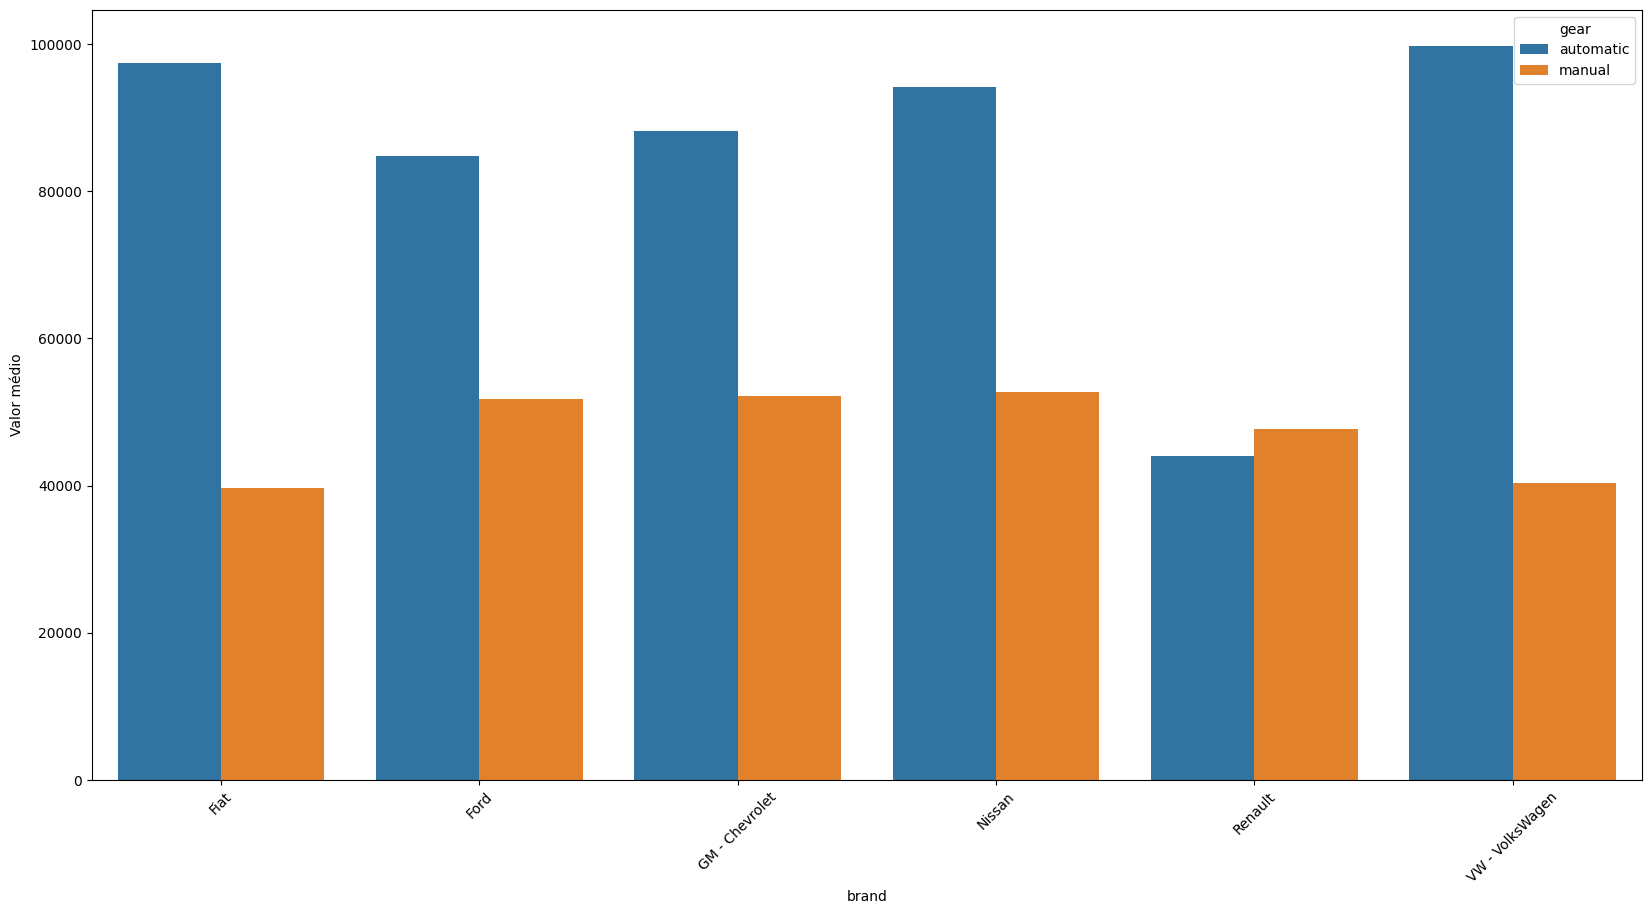

In [23]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Valor médio', hue='gear', data=media_salarial_ano, hue_order=['automatic', 'manual'])
plt.xticks(rotation=45);

#### f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

In [24]:
# Calculando a média por ano (coluna Data ultimo aumento - Ano) para saber se os salários aumentaram ou diminuíram entre 2021 e 2023
media_combustivel_marca = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean().round(0) # round para arrendodar
media_combustivel_marca.head()

brand  fuel    
Fiat   Alcohol     11510.0
       Diesel      99814.0
       Gasoline    37197.0
Ford   Alcohol     10149.0
       Diesel      94526.0
Name: avg_price_brl, dtype: float64

In [25]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
media_combustivel_marca = media_combustivel_marca.reset_index(name='Valor médio')
media_combustivel_marca.head()

,brand,fuel,Valor médio
0,Fiat,Alcohol,11510.0
1,Fiat,Diesel,99814.0
2,Fiat,Gasoline,37197.0
3,Ford,Alcohol,10149.0
4,Ford,Diesel,94526.0


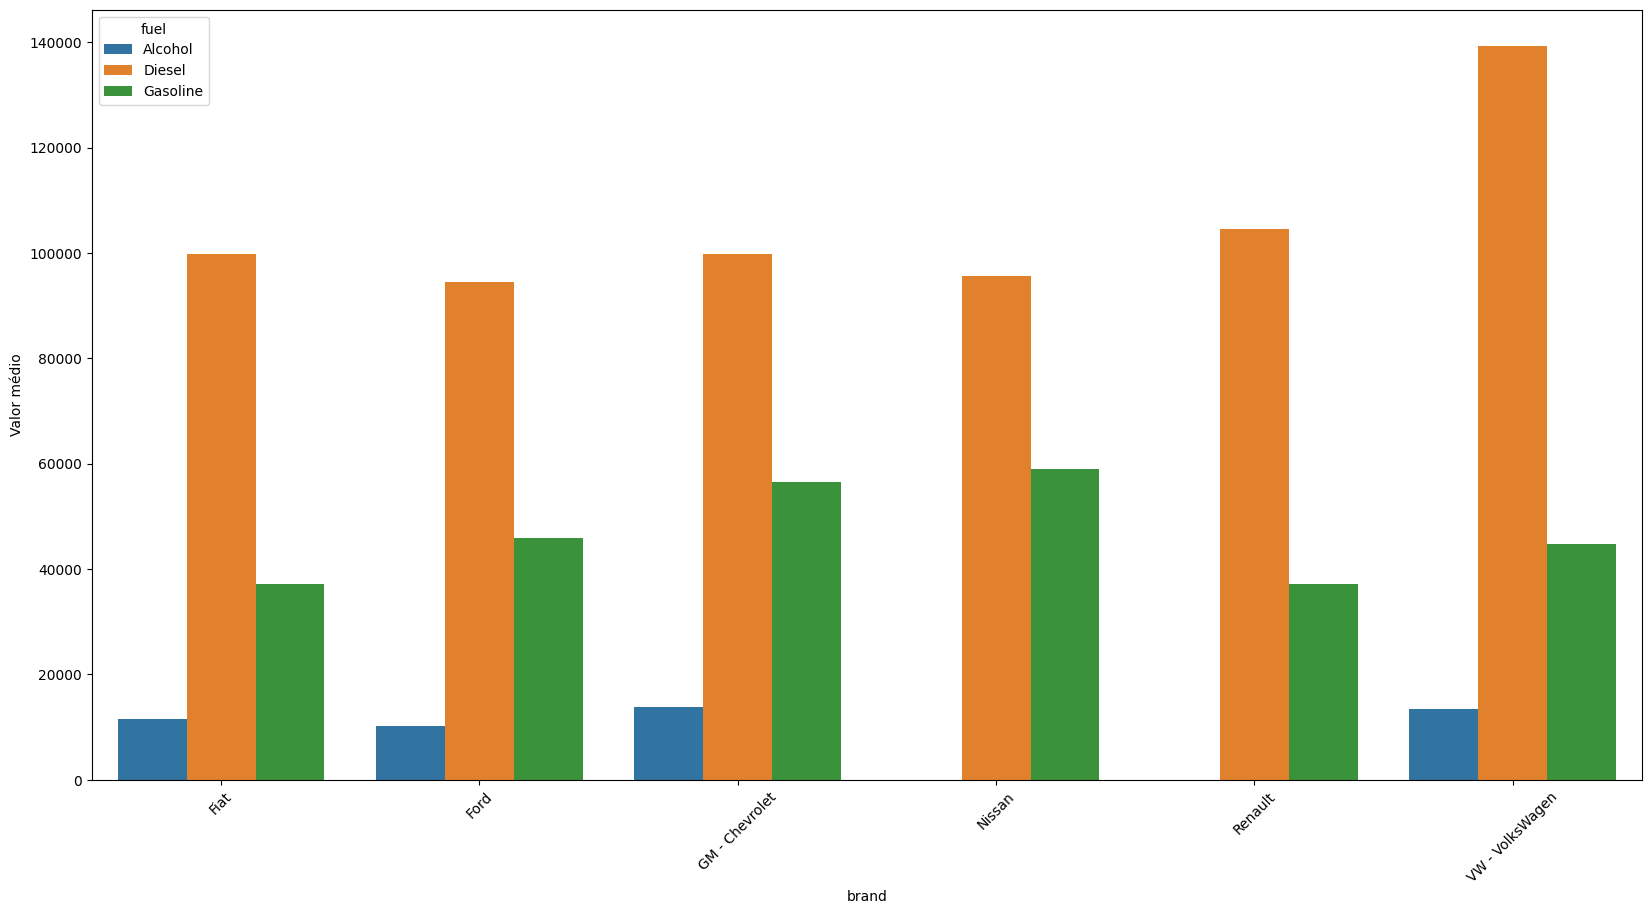

In [26]:
# Visualizando a média salarial por ano
plt.figure(figsize=(20,10)) # Aumentar tamanho da imagem que será impressa na tela
sns.barplot(x='brand', y='Valor médio', hue='fuel', data=media_combustivel_marca, hue_order=['Alcohol', 'Diesel','Gasoline'])
plt.xticks(rotation=45);

---
### 3 Aplicação de modelos de machine learning para prever o preço médio dos carros

#### a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas.

In [27]:
# Imprime o tipo de dado em cada coluna: object - variáveis categóricas; float64 e int64 - variáveis numéricas
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [33]:
# transformando brand, fuel, gear, engine_size,
dados['brand'] = LabelEncoder().fit_transform(dados['brand'])
dados['fuel'] = LabelEncoder().fit_transform(dados['fuel'])
dados['gear'] = LabelEncoder().fit_transform(dados['gear'])
dados['engine_size'] = LabelEncoder().fit_transform(dados['engine_size'])
dados.head()


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,0,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,0,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,2,Corsa Wind 1.0 MPFI / EFI 2p,2,1,0,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,2,Corsa Wind 1.0 MPFI / EFI 2p,0,1,0,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,2,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,2,1,5,2001.0,12525.0


In [34]:
# Variável dados_num contém apenas variáveis numéricas de interesse (exclui o restante)
dados_num = dados.drop(['year_of_reference', 'month_of_reference', 'fipe_code', 'authentication',
       'model'],axis = 1)
dados_num.head()

,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2,2,1,0,2002.0,9162.0
1,2,2,1,0,2001.0,8832.0
2,2,2,1,0,2000.0,8388.0
3,2,0,1,0,2000.0,8453.0
4,2,2,1,5,2001.0,12525.0


In [35]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target 
X = dados_num.drop(['avg_price_brl'],axis = 1)
X.head()

,brand,fuel,gear,engine_size,year_model
0,2,2,1,0,2002.0
1,2,2,1,0,2001.0
2,2,2,1,0,2000.0
3,2,0,1,0,2000.0
4,2,2,1,5,2001.0


In [36]:
# Variável Y contém apenas a variável target - Faixa Salarial
Y = dados_num['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

#### b. Crie partições contendo 75% dos dados para treino e 25% para teste


In [37]:
# Divisão: 30% dos dados são de teste e 70% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [38]:
# Observando os dados de treinamento
print(X_train.shape)
X_train.head(1)

(151721, 5)


,brand,fuel,gear,engine_size,year_model
156364,0,1,1,10,2020.0


In [39]:
# Observando os dados de teste
print(X_test.shape)
X_test.head(1)

(50574, 5)


,brand,fuel,gear,engine_size,year_model
180633,0,2,1,5,2015.0


In [40]:
# Observando a variável target
Y_test.head()

180633    42595.0
13130     10989.0
163315     9087.0
121464    26965.0
14044     57102.0
Name: avg_price_brl, dtype: float64

#### c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo.


#### Random Forest

In [41]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()

In [42]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

In [43]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_rf = model_rf.predict(X_test)

In [44]:
# Valores preditos
valores_preditos_rf

array([ 42270.40298176,  13436.69357589,  14543.35902684, ...,
       101140.51207464,  14850.33501653,  23353.21743652])

In [45]:
#Analisando a importância das variáveis para estimar a variável target
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.485946
year_model,0.414854
gear,0.038661
fuel,0.034159
brand,0.026380


MSE - calcula o erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.

In [46]:
mse = mean_squared_error(Y_test, valores_preditos_rf)
mse

136086591.31969938

O MAE calcula a média da diferença absoluta entre o valor predito e o valor real. Nesse caso, os erros são penalizados linearmente, ou seja, todos terão o mesmo peso na média.

In [50]:
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mae

6534.446034950457

O R² é uma métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo. Quanto maior seu valor, melhor é o modelo 

In [48]:
r2_score(Y_test, valores_preditos_rf)

0.9494338240527112

#### XGBoost

In [51]:
model_xgboost = XGBRegressor()

In [52]:
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
# Predição dos valores de salário com base nos dados de teste
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([ 42415.45 ,  13904.359,  14995.992, ..., 101365.51 ,  14413.766,
        23253.059], dtype=float32)

In [54]:
# Analisando a importância das variáveis para estimar a variável target. Observe o aumento da importância das variáveis 'Idade' e 'Genero'
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.434859
year_model,0.247087
fuel,0.155545
gear,0.126369
brand,0.036140


In [55]:
# Métricas de avaliação do modelo
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
r2_score(Y_test, valores_preditos_xgboost)

0.9490859382216905

##### d. Grave os valores preditos em variáveis criadas

In [56]:
# Valores preditos random forest
valores_preditos_rf

array([ 42270.40298176,  13436.69357589,  14543.35902684, ...,
       101140.51207464,  14850.33501653,  23353.21743652])

In [57]:
# Valores preditos xgboost
valores_preditos_xgboost

array([ 42415.45 ,  13904.359,  14995.992, ..., 101365.51 ,  14413.766,
        23253.059], dtype=float32)

#### e. Realize a análise de importância das variáveis para estimar a variável target, para cada modelo treinado